#STHITAPRAGYAN MAHAPATRA
#FET/BCE/2021-25/107

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
(Xtrain,ytrain),(Xtest,ytest)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 252s 1us/step


In [5]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

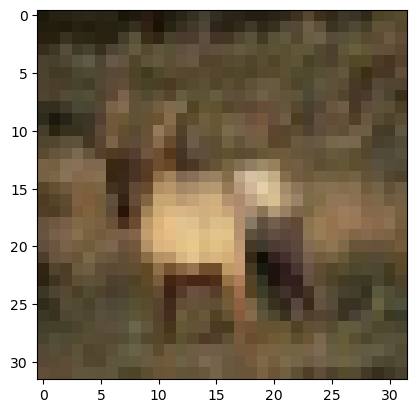

In [6]:
plt.imshow(Xtrain[3])

In [7]:
ytest.shape

(10000, 1)

In [8]:
ytrain,ytest=ytrain.reshape(-1),ytest.reshape(-1)

In [14]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

##Innitialising CNN

In [15]:
Xtrain_processed=(Xtrain / Xtrain.max()).astype(np.float32)
Xtest_processed=(Xtest / Xtest.max()).astype(np.float32)

In [16]:
model=tf.keras.Sequential(layers=None)
model.add(tf.keras.layers.Convolution2D(32,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=Xtrain.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [18]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [33]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.fit(x=Xtrain_processed,y=ytrain,batch_size=None,epochs=10,verbose='auto',callbacks=None,validation_split=0.3,
                  validation_data=None,shuffle=True)

Epoch 1/10
1094/1094 [==============================] - 13s 11ms/step - loss: 0.5802 - accuracy: 0.7915 - val_loss: 0.9429 - val_accuracy: 0.6903
Epoch 2/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.5360 - accuracy: 0.8110 - val_loss: 0.9662 - val_accuracy: 0.7014
Epoch 3/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.4954 - accuracy: 0.8238 - val_loss: 0.9941 - val_accuracy: 0.6887
Epoch 4/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.4589 - accuracy: 0.8378 - val_loss: 1.0630 - val_accuracy: 0.6877
Epoch 5/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.4249 - accuracy: 0.8490 - val_loss: 1.0621 - val_accuracy: 0.6877
Epoch 6/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.3869 - accuracy: 0.8641 - val_loss: 1.1571 - val_accuracy: 0.6752
Epoch 7/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.3601 - accuracy: 0.8729 - val_loss: 1.1966 -

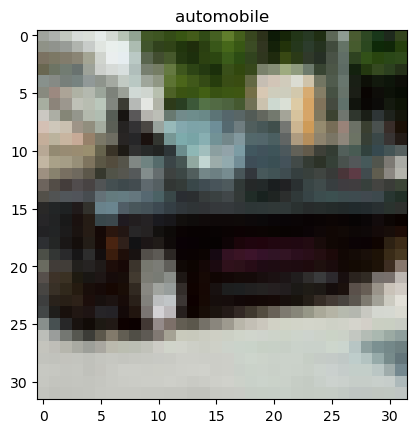

In [50]:
random_index=np.random.choice(range(Xtest.shape[0]))
plt.imshow(Xtest[random_index])
plt.title(labels[ytest[random_index]])
plt.show()

In [51]:
probabilities=model.predict(Xtest[[random_index]])

1/1 [==============================] - 0s 20ms/step


In [52]:
for i in range(10):
    print(labels[i],"---->",probabilities[0][i])

airplane ----> 0.0
automobile ----> 1.0
bird ----> 0.0
cat ----> 0.0
deer ----> 0.0
dog ----> 0.0
frog ----> 0.0
horse ----> 0.0
ship ----> 0.0
truck ----> 0.0


In [53]:
pred=list(probabilities[0])

In [54]:
print("The image is :",labels[pred.index(max(pred))])

The image is : automobile
